# Exercise 1 – Perceptron (Binary Logic and Gaussian Classification)
### This phrase refers to using a perceptron model (a simple linear classifier) to learn logical operations (like AND or OR) on data that may be sampled from Gaussian distributions.

In [1]:
# Step 1: Import basic libraries
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


### Activation and perceptron output function

In [2]:
def f(s):
    """Activation function: returns 1 if s > 0.5, else 0"""
    return 1 if s > 0.5 else 0

def perceptron_output(x1, x2, w0, w1, w2):
    """Computes the perceptron output using the equation o = f(w0 + w1*x1 + w2*x2)"""
    s = w0 + w1 * x1 + w2 * x2
    return f(s)

### Choose operation (AND or OR) and dataset

In [3]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
d = np.array([0, 1, 1, 1])  # OR operation desired outputs
# For AND, you can switch to: d = np.array([0, 0, 0, 1])

### Initialize weights and learning rate

In [4]:
np.random.seed(42)
w0, w1, w2 = np.random.uniform(-0.5, 0.5, 3)
alpha = 1e-2  # learning rate
epochs = 20

epoch_errors = []
weights_history = []

### Train the perceptron

In [5]:
# Step 5: Training loop for 20 epochs
for epoch in range(epochs):
    total_error = 0
    dw0 = dw1 = dw2 = 0

    for i in range(len(X)):
        x1, x2 = X[i]
        o = perceptron_output(x1, x2, w0, w1, w2)
        e = d[i] - o  # error
        total_error += abs(e)

        # Accumulate updates
        dw0 += alpha * e
        dw1 += alpha * x1 * e
        dw2 += alpha * x2 * e

    # Update weights after one epoch
    w0 += dw0
    w1 += dw1
    w2 += dw2

    # Record progress
    epoch_errors.append(total_error)
    weights_history.append((w0, w1, w2))

print("Final weights:", w0, w1, w2)


Final weights: 0.10454011884736249 0.5107143064099162 0.40199394181140524


### Plot error and weight convergence

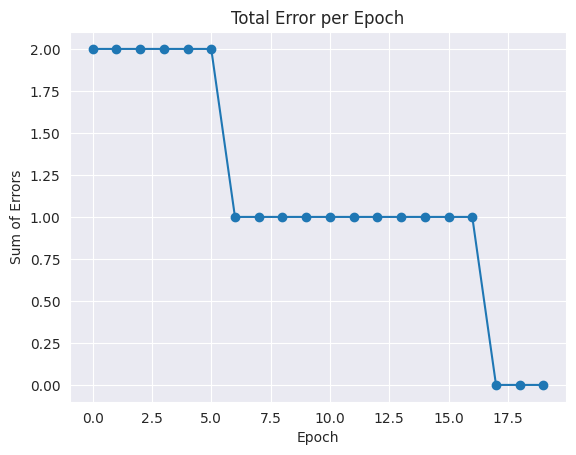

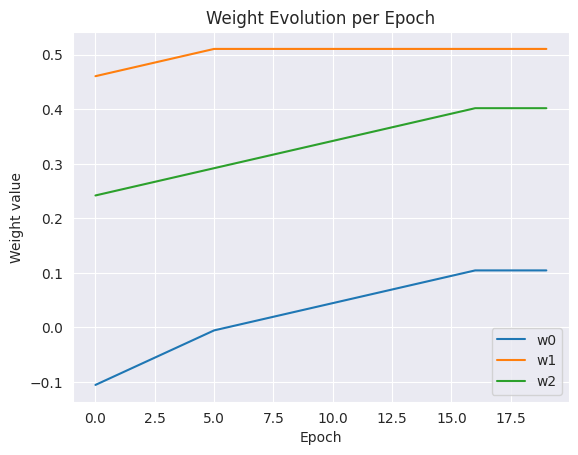

In [6]:
# Plot total error per epoch
plt.plot(epoch_errors, marker='o')
plt.title("Total Error per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Sum of Errors")
plt.grid(True)
plt.show()

# Plot weight evolution
weights_history = np.array(weights_history)
plt.plot(weights_history[:,0], label='w0')
plt.plot(weights_history[:,1], label='w1')
plt.plot(weights_history[:,2], label='w2')
plt.title("Weight Evolution per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Weight value")
plt.legend()
plt.grid(True)
plt.show()


### Compare effect of learning rate alpha
* smaller a = slower learning
* too large a = instability

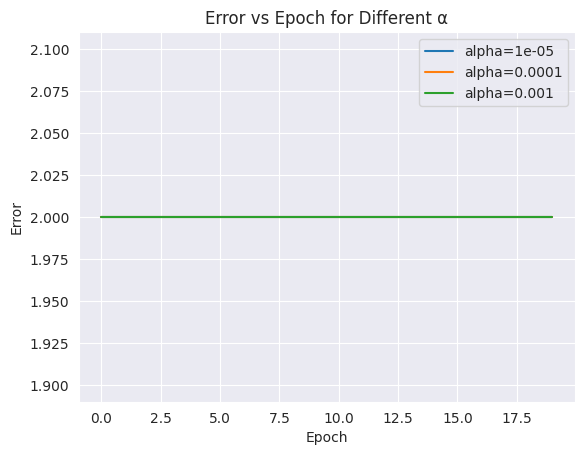

In [7]:
# Step 6c: Compare effect of different alpha values
alphas = [1e-5, 1e-4, 1e-3]
for a in alphas:
    np.random.seed(42)
    w0,w1,w2 = np.random.uniform(-0.5,0.5,3)
    errs = []
    for epoch in range(20):
        total_error = 0
        dw0 = dw1 = dw2 = 0
        for i in range(len(X)):
            x1,x2 = X[i]
            o = perceptron_output(x1,x2,w0,w1,w2)
            e = d[i]-o
            total_error += abs(e)
            dw0 += a*e
            dw1 += a*x1*e
            dw2 += a*x2*e
        w0+=dw0; w1+=dw1; w2+=dw2
        errs.append(total_error)
    plt.plot(errs, label=f"alpha={a}")

plt.title("Error vs Epoch for Different α")
plt.xlabel("Epoch"); plt.ylabel("Error")
plt.legend(); plt.grid(True); plt.show()


### Repeat experiment 30 times and compute convergence statistics

In [8]:
# Repeat training 30 times and measure epochs to full correctness

def train_perceptron(alpha=1e-4, max_epochs=1000):
    X = np.array([[0,0],[0,1],[1,0],[1,1]])
    d = np.array([0,1,1,1])
    w0, w1, w2 = np.random.uniform(-0.5,0.5,3)
    for epoch in range(max_epochs):
        total_error = 0
        dw0 = dw1 = dw2 = 0
        for i in range(4):
            o = perceptron_output(X[i,0], X[i,1], w0, w1, w2)
            e = d[i] - o
            total_error += abs(e)
            dw0 += alpha * e
            dw1 += alpha * X[i,0] * e
            dw2 += alpha * X[i,1] * e
        w0 += dw0
        w1 += dw1
        w2 += dw2
        if total_error == 0:
            return epoch+1
    return max_epochs

epochs_needed = [train_perceptron() for _ in range(30)]
print("Average epochs to converge:", np.mean(epochs_needed))
print("Standard deviation:", np.std(epochs_needed))


Average epochs to converge: 933.4
Standard deviation: 249.19438195914452


### Generate 2D Gauussian data set

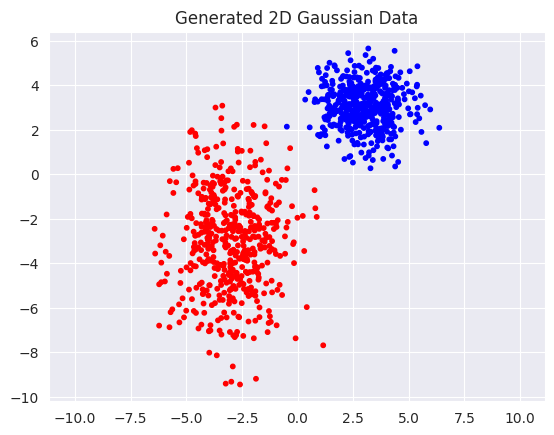

In [9]:
# Step 7: Generate two Gaussian clusters as in Figure 2
mean1 = [3,3]
cov1  = [[1,0],[0,1]]
a = np.random.multivariate_normal(mean1, cov1, 500)

mean2 = [-3,-3]
cov2  = [[2,0],[0,5]]
b = np.random.multivariate_normal(mean2, cov2, 500)

Xg = np.vstack((a,b))
labels_g = np.array([0]*500 + [1]*500)

# Shuffle dataset
idx = np.arange(len(Xg))
np.random.shuffle(idx)
Xg = Xg[idx]; labels_g = labels_g[idx]

plt.scatter(Xg[:,0], Xg[:,1], c=labels_g, cmap='bwr', s=10)
plt.title("Generated 2D Gaussian Data")
plt.axis('equal'); plt.show()


### Train same perceptron on gaussian data

In [10]:
# Step 8: Perceptron training on Gaussian dataset
def train_perceptron_gaussian(X, d, alpha=1e-4, epochs=30):
    w0,w1,w2 = np.random.uniform(-0.5,0.5,3)
    for _ in range(epochs):
        dw0 = dw1 = dw2 = 0
        for i in range(len(X)):
            x1,x2 = X[i]
            o = perceptron_output(x1,x2,w0,w1,w2)
            e = d[i]-o
            dw0 += alpha*e
            dw1 += alpha*x1*e
            dw2 += alpha*x2*e
        w0+=dw0; w1+=dw1; w2+=dw2
    return w0,w1,w2

w0g,w1g,w2g = train_perceptron_gaussian(Xg, labels_g)
print("Trained weights (Gaussian):", w0g, w1g, w2g)


Trained weights (Gaussian): 0.46963851388353406 -0.1620573075809475 -0.22087200857749467


### Visualize classification regions & confusion matrix

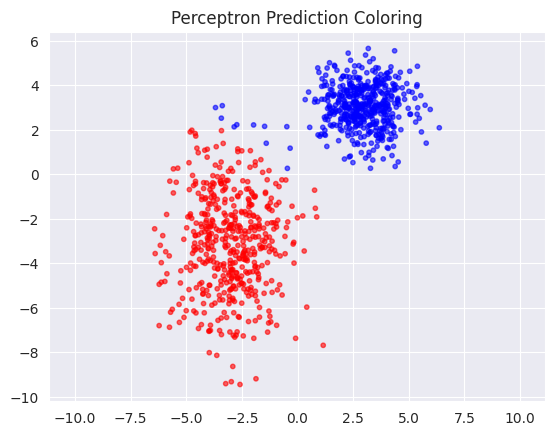

Confusion Matrix:
 [[500   0]
 [ 10 490]]


In [11]:
# Step 9a: Predict labels
preds = [perceptron_output(x1,x2,w0g,w1g,w2g) for x1,x2 in Xg]
preds = np.array(preds)

# Plot predicted vs actual
colors = ['red' if p==1 else 'blue' for p in preds]
plt.scatter(Xg[:,0], Xg[:,1], c=colors, s=10, alpha=0.6)
plt.title("Perceptron Prediction Coloring")
plt.axis('equal'); plt.show()

# Step 9b: Confusion matrix
cm = confusion_matrix(labels_g, preds)
print("Confusion Matrix:\n", cm)


### Compute average metrics over 30 random runs

In [12]:
# Step 10: Repeat training 30 times for metrics
accs, precs, recs, f1s = [], [], [], []

for _ in range(30):
    w0g,w1g,w2g = train_perceptron_gaussian(Xg, labels_g)
    preds = [perceptron_output(x1,x2,w0g,w1g,w2g) for x1,x2 in Xg]
    preds = np.array(preds)
    accs.append(accuracy_score(labels_g, preds))
    precs.append(precision_score(labels_g, preds))
    recs.append(recall_score(labels_g, preds))
    f1s.append(f1_score(labels_g, preds))

print(f"Average Accuracy: {np.mean(accs):.3f}")
print(f"Average Precision: {np.mean(precs):.3f}")
print(f"Average Recall: {np.mean(recs):.3f}")
print(f"Average F1: {np.mean(f1s):.3f}")


Average Accuracy: 0.982
Average Precision: 1.000
Average Recall: 0.965
Average F1: 0.982
